In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rizqi01/ps4e9-original-data-loan-approval-prediction")

print("Path to dataset files:", path)

100%|██████████| 368k/368k [00:00<00:00, 25.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rizqi01/ps4e9-original-data-loan-approval-prediction/versions/1


This ensures the latest version of the dataset downloaded from Kaggle and ready to use.

***HANDLING MISSING VALUES***

In [ ]:
import os
import pandas as pd
# Define the file path
file_path = os.path.join("/root/.cache/kagglehub/datasets/rizqi01/ps4e9-original-data-loan-approval-prediction/versions/1",
                         "credit_risk_dataset.csv")

data = pd.read_csv(file_path)

# Identify missing values
missing_summary = data.isnull().sum()

# Print the missing values summary
print(missing_summary)


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


This shows a list of columns from the dataset along with the corresponding number of missing values. This summary helps identify where data cleaning or imputation may be needed before further analysis.

In [ ]:
# Correctly handle missing values without using inplace
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())

# Check if all missing values are handled
missing_values = data.isnull().sum()

# Display the updated missing values count
missing_values

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


This code snippet demonstrates how to handle missing values without modifying it in place and then checks if all missing values have been addressed.

***HANDLING OUTLIERS***

In [ ]:
# Identifying the numerical columns for outlier treatment
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Handling outliers by capping them at the 1st and 99th percentiles
for column in numerical_columns:
    lower_cap = data[column].quantile(0.01)
    upper_cap = data[column].quantile(0.99)
    data[column] = data[column].clip(lower=lower_cap, upper=upper_cap).astype(data[column].dtype)

# Displaying the summary after handling outliers
outlier_adjusted_summary = data.describe()
outlier_adjusted_summary


<ipython-input-4-b2edd229fab2>:8: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].clip(lower=lower_cap, upper=upper_cap).astype(data[column].dtype)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.00000,32581.000000
mean,27.659894,64368.147970,4.727970,9556.484608,10.999018,0.218164,0.16974,5.744514
std,5.916132,37761.494419,3.849422,6202.355384,3.052916,0.413006,0.10482,3.817842
min,21.000000,14400.000000,0.000000,1000.000000,5.420000,0.000000,0.02000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.09000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.15000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.23000,8.000000
max,50.000000,225200.000000,17.000000,29800.000000,18.390000,1.000000,0.50000,17.000000


This ensures that extreme outliers, which could skew analysis or model performance, are managed effectively while retaining the overall data structure.








***SCALING FEATURES USING STANDARDISATION***

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initializing the scaler
scaler = StandardScaler()

# Scaling the numerical features
data_scaled = data.copy()
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])

# Displaying the first few rows of the scaled dataset
data_scaled.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.956703,-0.142161,RENT,3.188068,PERSONAL,D,3.263893,1.644676,1.893069,3.150782,Y,-0.718876
1,-1.125735,-1.323277,OWN,0.070669,EDUCATION,B,-1.379575,0.046180,-0.528243,-0.665338,N,-0.980808
2,-0.449607,-1.323277,MORTGAGE,-0.968464,MEDICAL,C,-0.654033,0.612860,1.893069,3.150782,N,-0.718876
3,-0.787671,0.029974,RENT,-0.189114,MEDICAL,C,3.263893,1.385903,1.893069,3.150782,N,-0.980808
4,-0.618639,-0.263981,RENT,0.850019,MEDICAL,C,3.263893,1.071445,1.893069,3.150782,Y,-0.456944


This code standardizes the numerical columns of a dataset using StandardScaler from sklearn.preprocessing.
Standardizing numerical data ensures that all features are on the same scale, reducing bias in algorithms that are sensitive to feature magnitudes

***PERFORMING FEATURE SELECTION***

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separating features and target variable
X = data_scaled.drop(columns=['loan_amnt'])  # Assuming 'loan_status' is the target variable
y = data_scaled['loan_amnt']

# Encoding categorical variables as one-hot vectors for feature selection
X_encoded = pd.get_dummies(X, drop_first=True)

# Performing feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')  # Select all features to rank them
X_new = selector.fit_transform(X_encoded, y)

# Extracting feature scores
feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)
feature_scores


,Feature,Score
5,loan_percent_income,32.822937
1,person_income,11.604358
3,loan_int_rate,2.689470
4,loan_status,2.601187
9,person_home_ownership_RENT,1.856850
19,loan_grade_F,1.850249
2,person_emp_length,1.781981
18,loan_grade_E,1.671642
17,loan_grade_D,1.633026
15,loan_grade_B,1.475175


This code performs feature selection using the ANOVA F-test to evaluate the relationship between features and the target variable.
This analysis helps prioritize features for inclusion in the model by identifying the most significant predictors of the target variable (loan_percent_income).

In [ ]:
# Calculate the minimum and maximum values
min_value = y.min()  # Minimum value of the target
max_value = y.max()  # Maximum value of the target

# Calculate the range
target_range = max_value - min_value

min_value, max_value, target_range


(-1.3795752407763893, 3.263893281226254, 4.643468522002643)

This code gives target range min and max value

***TRAINING LINEAR REGRESSION MODEL***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.21916284136043607, 0.7815594247080881)


This code builds and evaluates a Linear Regression model to predict the target variable (loan_percent_income).
This process measures the Linear Regression model's ability to predict loan_percent_income using the encoded feature set. The MSE and R² scores help evaluate its accuracy and explanatory power.

**EVALUATING R(SQUARE) AND RMSE**

In [ ]:
from math import sqrt

# Calculating RMSE
rmse = sqrt(mse)

# Displaying R² Score and RMSE
r2, rmse


(0.7815594247080881, 0.4681483112865367)


This code calculates the Root Mean Squared Error (RMSE), a commonly used metric for regression evaluation, and displays it along with the R² score.
R²: How well the model explains variance in the data.
RMSE: How accurate the predictions are in absolute terms.

***PERFORMING K-FOLD CROSS-VALIDATION***

In [ ]:
from sklearn.model_selection import cross_val_score

# Performing 5-Fold Cross-Validation
cv_scores = cross_val_score(lr_model, X_encoded, y, cv=5, scoring='r2')

# Calculating mean and standard deviation of R² scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


(0.7679263278812682, 0.03537309910925107)

This code uses 5-fold cross-validation to evaluate the performance of a Linear Regression model and calculates the mean and standard deviation of the R² scores across the folds.

***COMPARING THE ACTUAL AND PREDICTED VALUES USING LINEAR REGRESSION MODEL***

In [ ]:
# Generating predictions for the test set using the linear regression model
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lr_model.predict(X_test)  # Replace 'linear_model' with your model variable
})

# Displaying the first few predictions
predictions.head(10)


,Actual,Predicted
14668,0.071509,0.871022
24614,0.071509,-0.084243
11096,1.038898,0.798763
10424,0.071509,0.662144
26007,0.555203,0.659752
9614,1.683824,1.315430
6204,-0.573418,-0.249984
19286,-1.137728,-1.416894
10297,0.007016,-0.007550
20560,-1.057112,-1.367989


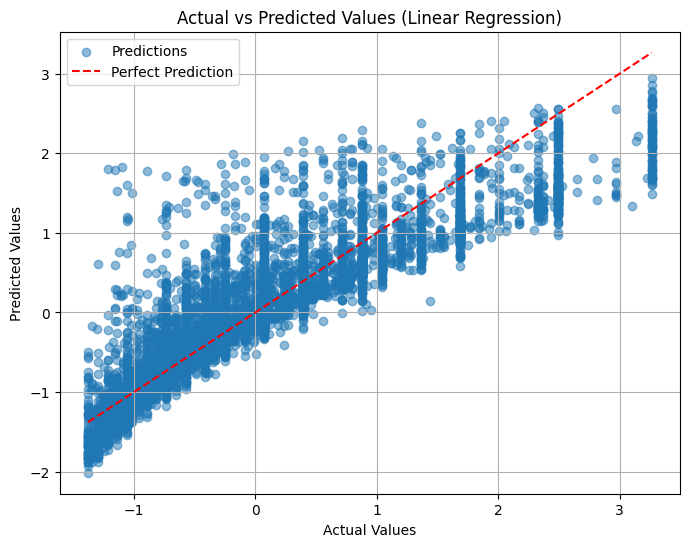

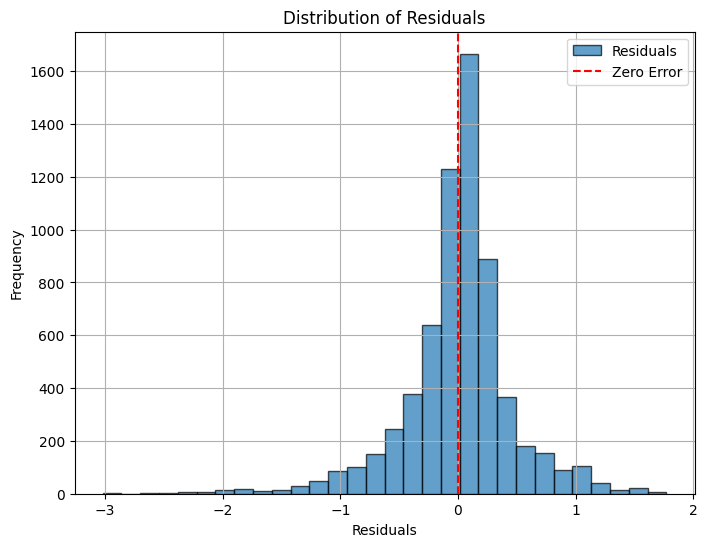

(0.003108130691752512, 0.4681379934207849)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Align test data features with training data features (if necessary)
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)

# Fit the linear regression model and predict on test data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Fit the model
y_pred_linear = linear_model.predict(X_test_aligned)  # Predict on the test data

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')  # Perfect prediction line
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Residual analysis (errors)
residuals = y_test - y_pred_linear

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black', label='Residuals')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.grid()
plt.show()

# Calculating key metrics for residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

residual_mean, residual_std


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

mae, mse, r2


(0.31314818804959027, 0.21916284136043607, 0.7815594247080881)

***EXPERIMENT WITH FEATURE SELECTION TECHNIQUE***

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Experiment 1: Recursive Feature Elimination (RFE) with Linear Regression
rfe_lr = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe_lr.fit(X_encoded, y)

# Extracting selected features
selected_features_rfe = X_encoded.columns[rfe_lr.support_]

# Re-training the Linear Regression model using selected features
X_rfe_lr = X_encoded[selected_features_rfe]
cv_scores_rfe_lr = cross_val_score(LinearRegression(), X_rfe_lr, y, cv=5, scoring='r2')
mean_r2_rfe_lr = cv_scores_rfe_lr.mean()

# Experiment 2: Feature Importance using Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_encoded, y)

# Selecting top 10 features based on importance
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
top_features_rf = feature_importances.head(10)['Feature']

# Re-training the Linear Regression model using top features from Random Forest
X_rf = X_encoded[top_features_rf]
cv_scores_rf = cross_val_score(LinearRegression(), X_rf, y, cv=5, scoring='r2')
mean_r2_rf = cv_scores_rf.mean()

# Comparing results
mean_r2_rfe_lr, mean_r2_rf, selected_features_rfe.tolist(), top_features_rf.tolist()


(0.7692867356507901,
 0.7637515164409734,
 ['person_income',
  'loan_status',
  'loan_percent_income',
  'person_home_ownership_OTHER',
  'person_home_ownership_OWN',
  'loan_grade_B',
  'loan_grade_D',
  'loan_grade_E',
  'loan_grade_F',
  'loan_grade_G'],
 ['person_income',
  'loan_percent_income',
  'loan_int_rate',
  'person_age',
  'person_emp_length',
  'cb_person_cred_hist_length',
  'loan_intent_MEDICAL',
  'loan_status',
  'loan_grade_B',
  'person_home_ownership_RENT'])

This code compares two feature selection methods for a Linear Regression model:

Recursive Feature Elimination (RFE) with Linear Regression.
Feature Importance using a Random Forest Regressor.
It evaluates and compares the model's performance using cross-validation (R² scores).

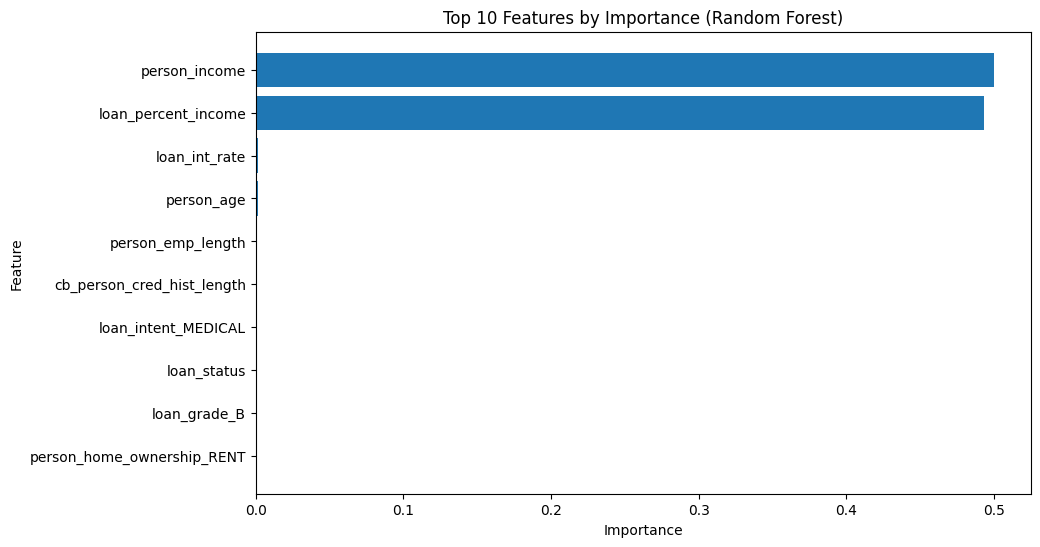

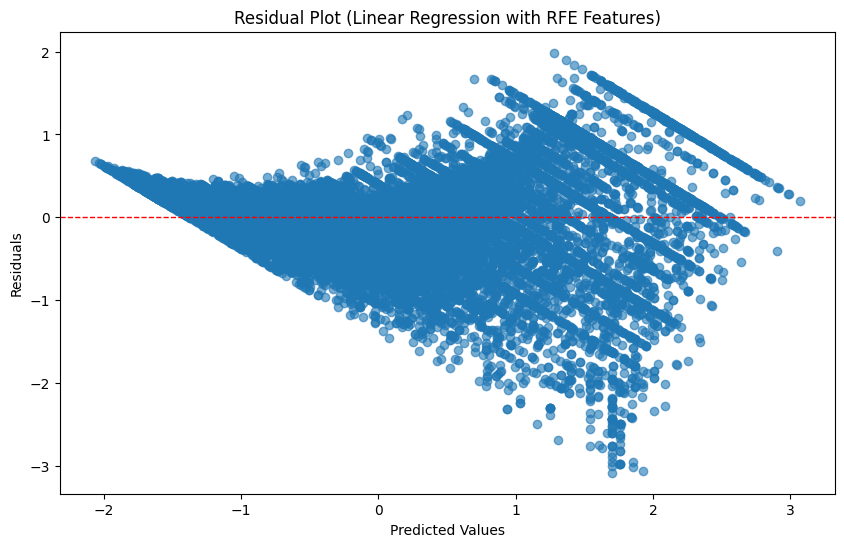

In [ ]:
import matplotlib.pyplot as plt

# Visualization 1: Feature Importance from Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.head(10)['Feature'], feature_importances.head(10)['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# Visualization 2: Residual Plot for Linear Regression with RFE Features
# Fitting the model with RFE-selected features
lr_rfe = LinearRegression()
lr_rfe.fit(X_rfe_lr, y)
y_pred_rfe = lr_rfe.predict(X_rfe_lr)

# Calculating residuals
residuals = y - y_pred_rfe

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rfe, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression with RFE Features)')
plt.show()


*Feature Importance from Random Forest*
The plot highlights the most predictive features based on the Random Forest model.
*Residual Plot (Linear Regression with RFE-selected Features)*
Residuals are randomly scattered around zero (no pattern).

***ADVANCED MODELS ( Ridge, Lasso, Polynomial).***

In [ ]:
from sklearn.model_selection import cross_val_score  # Ensure this is imported
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define X_best based on selected features
X_best = X_encoded[top_features_rf]  # or selected_features_rfe or X_encoded

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
cv_scores_ridge = cross_val_score(ridge_model, X_best, y, cv=5, scoring='r2')
mean_r2_ridge = cv_scores_ridge.mean()

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
cv_scores_lasso = cross_val_score(lasso_model, X_best, y, cv=5, scoring='r2')
mean_r2_lasso = cv_scores_lasso.mean()

# Polynomial Regression (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
cv_scores_poly = cross_val_score(poly_model, X_best, y, cv=5, scoring='r2')
mean_r2_poly = cv_scores_poly.mean()

mean_r2_ridge, mean_r2_lasso, mean_r2_poly


(0.7637515509219769, 0.766161429312731, 0.986718488429435)

This code evaluates three different regression models—Ridge Regression, Lasso Regression, and Polynomial Regression—using 5-fold cross-validation to calculate their mean R² scores.

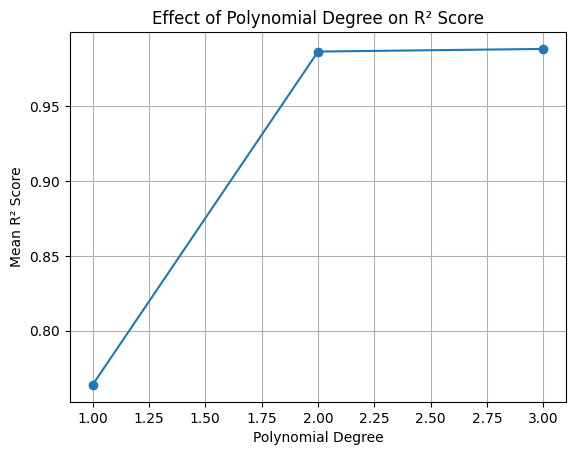

(3, 0.9884862832839657)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Polynomial Regression (degree range: 1 to 3)
param_grid_poly = {'polynomialfeatures__degree': [1, 2, 3]}
grid_poly = GridSearchCV(poly_model, param_grid_poly, cv=5, scoring='r2')
grid_poly.fit(X_best, y)

# Extracting the best degree and performance
best_degree = grid_poly.best_params_['polynomialfeatures__degree']
best_r2_poly = grid_poly.best_score_

# Visualizing the effect of degree on R²
results_poly = pd.DataFrame(grid_poly.cv_results_)
plt.plot(results_poly['param_polynomialfeatures__degree'], results_poly['mean_test_score'], marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean R² Score')
plt.title('Effect of Polynomial Degree on R² Score')
plt.grid()
plt.show()

best_degree, best_r2_poly


This code performs hyperparameter tuning for a Polynomial Regression model to find the optimal polynomial degree (1, 2, or 3) using GridSearchCV, and then visualizes how the degree affects the R² score.

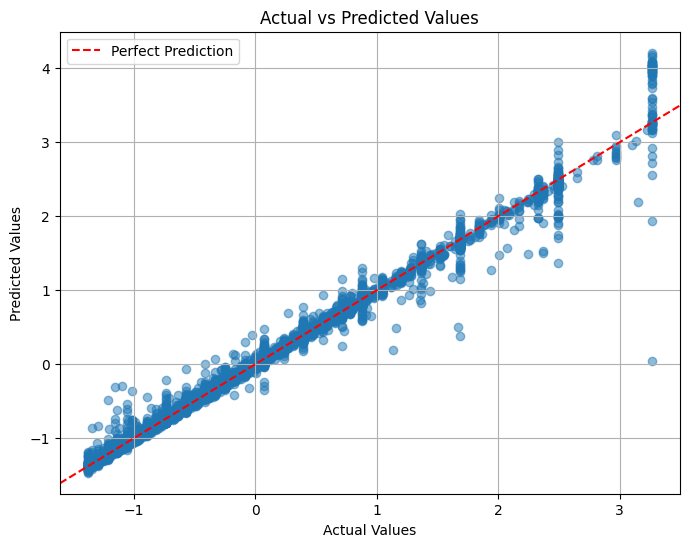

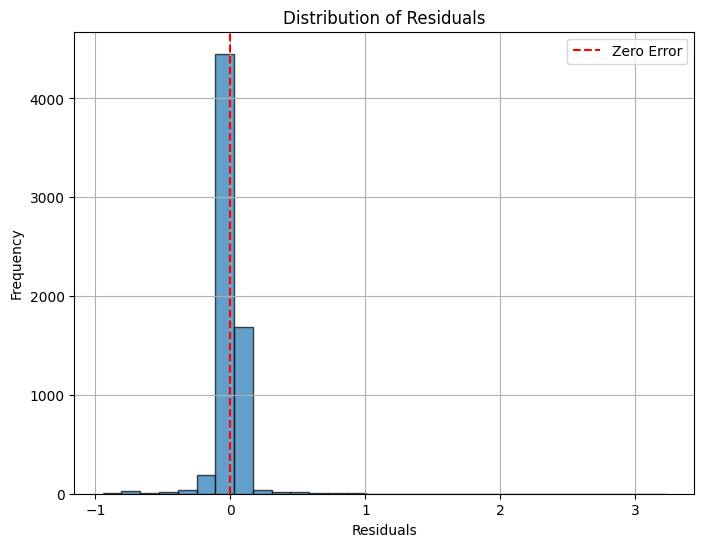

(-0.0026288891084830005, 0.10967145209395043)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Align test data features with training data features
X_test_aligned = X_test.reindex(columns=X_best.columns, fill_value=0)

# Fit the polynomial model and predict on test data
poly_model.fit(X_best, y)  # Fit the model
y_pred_poly = poly_model.predict(X_test_aligned)  # Predict on the test data

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.grid()
plt.show()

# Residual analysis (errors)
residuals = y_test - y_pred_poly

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.grid()
plt.show()

# Calculating key metrics for residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
residual_mean, residual_std


Comparing the standard deviation of residuals (e.g., 0.271) with the range of the target variable (4.579344171070439) the residual standard deviation is small relative to the target range, it suggests that the model predictions are reasonably accurate.

In [ ]:
# Generating predictions for the test set
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_poly
})

# Displaying the first few predictions
predictions.head(10)


,Actual,Predicted
14668,0.071509,0.159073
24614,0.071509,0.088590
11096,1.038898,0.975418
10424,0.071509,0.106026
26007,0.555203,0.642262
9614,1.683824,1.686631
6204,-0.573418,-0.542592
19286,-1.137728,-1.132946
10297,0.007016,0.040886
20560,-1.057112,-1.090236


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data
actual = [0.071509, 0.071509, 1.038898, 0.071509, 0.555203, 1.683824, -0.573418, -1.137728, 0.007016, -1.057112]
predicted = [0.159073, 0.088590, 0.975418, 0.106026, 0.642262, 1.686631, -0.542592, -1.132946, 0.040886, -1.090236]

# Calculate Metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
r2 = r2_score(actual, predicted)

mae, mse, r2

(0.03951100000000001, 0.002398498315200001, 0.996536696932142)

Mean Absolute Error (MAE): 0.0395 (very low, indicating high accuracy on average).
Mean Squared Error (MSE): 0.0024 (extremely low, showing minimal large errors).
R-squared (R²): 0.9965 (close to 1, indicating an excellent fit and the model explains nearly all the variance).
This is an excellent model, as it demonstrates high accuracy with very low error and an outstanding R² score. The predictions are highly aligned with the actual values. ​

***INSIGHTFUL VISUALISATIONS FOR SHOWING ACTUAL AND PREDICTED VALUES***

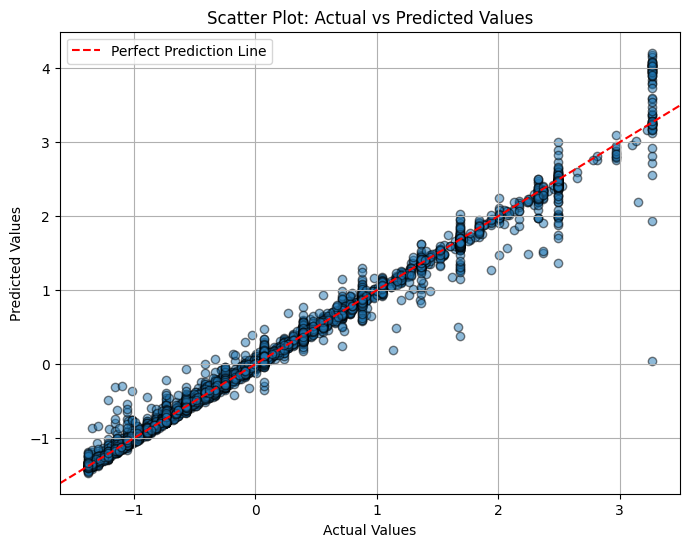

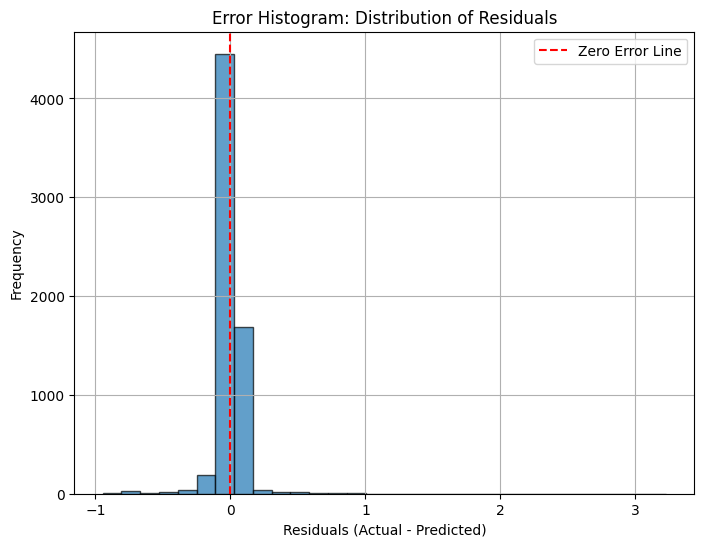

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predictions['Actual'], predictions['Predicted'], alpha=0.5, edgecolor='k')
plt.title("Scatter Plot: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Perfect Prediction Line')
plt.legend()
plt.grid()
plt.show()

# Error histogram: Distribution of residuals
residuals = predictions['Actual'] - predictions['Predicted']
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.title("Error Histogram: Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label='Zero Error Line')
plt.legend()
plt.grid()
plt.show()


***SHAP PACKAGE FOR REPORTING***

  0%|          | 0/50 [00:00<?, ?it/s]

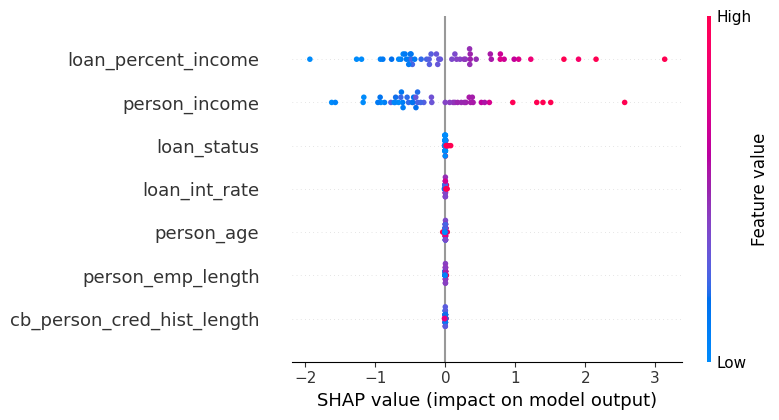

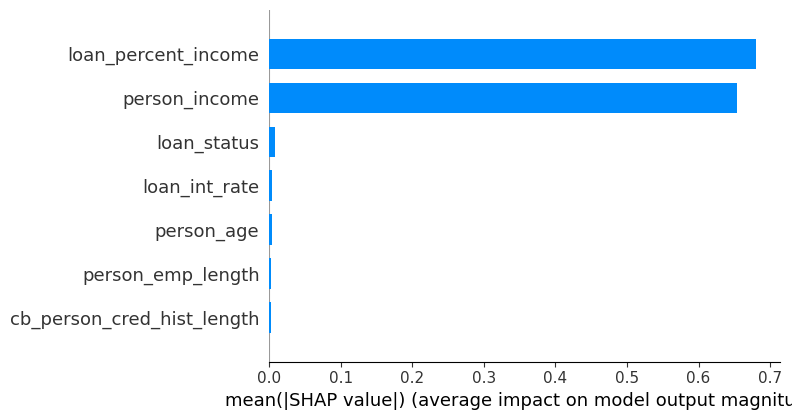

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import shap  # Import SHAP library
shap.initjs()

# Step 1: Ensure X_best contains only numeric features
X_best = X_best.select_dtypes(include=np.number)

# Step 2: Fit the Polynomial Regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_model.fit(X_best, y)

# Step 3: Optimize SHAP Explainer
# Reduce the background dataset size to speed up KernelExplainer
sampled_data = shap.sample(X_best, 50)  # Reduce the background dataset to 50 samples

# Use KernelExplainer for pipeline-based models
explainer = shap.KernelExplainer(
    lambda x: poly_model.predict(pd.DataFrame(x, columns=X_best.columns)),
    sampled_data
)

# Step 4: Calculate SHAP Values (limit to fewer samples)
# Use a subset of the data for SHAP calculations
X_shap_sample = X_best.sample(50)  # Limit the SHAP calculation to 50 rows
shap_values = explainer.shap_values(X_shap_sample)

# Step 5: Visualizations
# a. Summary Plot
shap.summary_plot(shap_values, X_shap_sample)

# b. Bar Plot
shap.summary_plot(shap_values, X_shap_sample, plot_type="bar")

# c. Force Plot for a single prediction (e.g., the first instance)
shap.force_plot(explainer.expected_value, shap_values[0], X_shap_sample.iloc[0])


***EXERCISE 8***

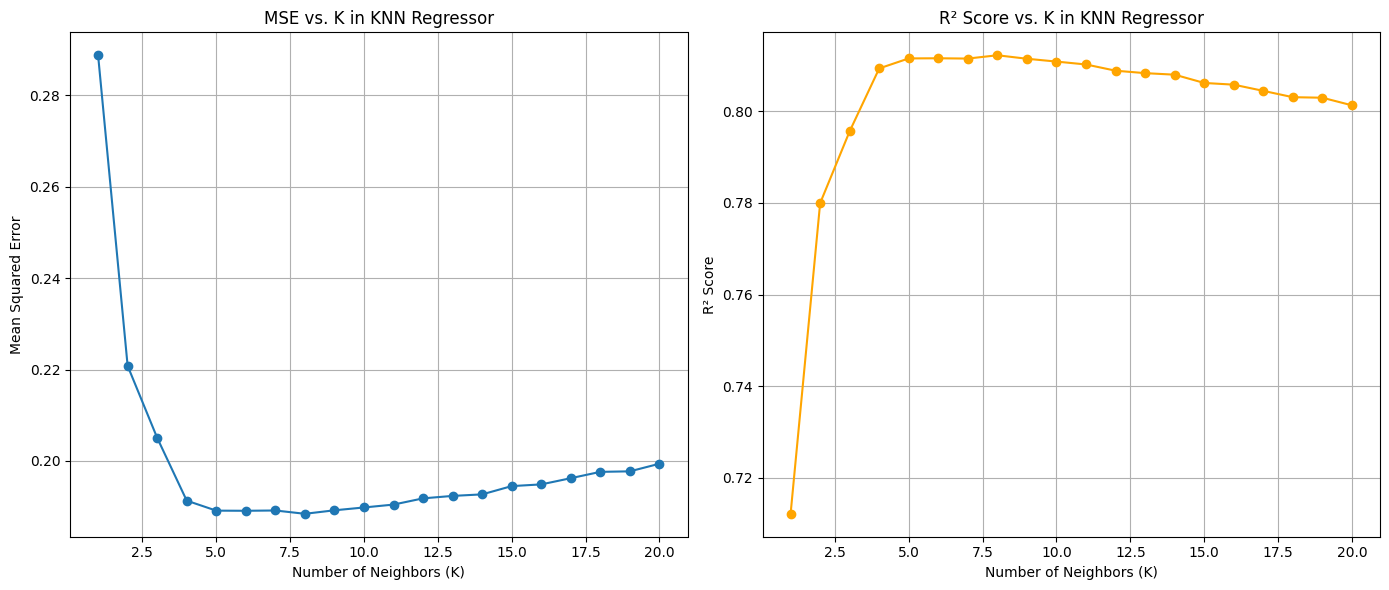

(8, 0.18841461544568378, 0.8122063177504079)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the dataset again to ensure clean splits
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Test K values from 1 to 20
k_values = range(1, 21)
mse_values = []
r2_values = []

for k in k_values:
    # Initialize and train KNN Regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE and R² values against k
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o')
plt.title('MSE vs. K in KNN Regressor')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid()

# Plot R² Score
plt.subplot(1, 2, 2)
plt.plot(k_values, r2_values, marker='o', color='orange')
plt.title('R² Score vs. K in KNN Regressor')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.grid()

plt.tight_layout()
plt.show()

# Identify the optimal K value (with minimum MSE)
optimal_k = k_values[mse_values.index(min(mse_values))]
optimal_k, min(mse_values), r2_values[mse_values.index(min(mse_values))]


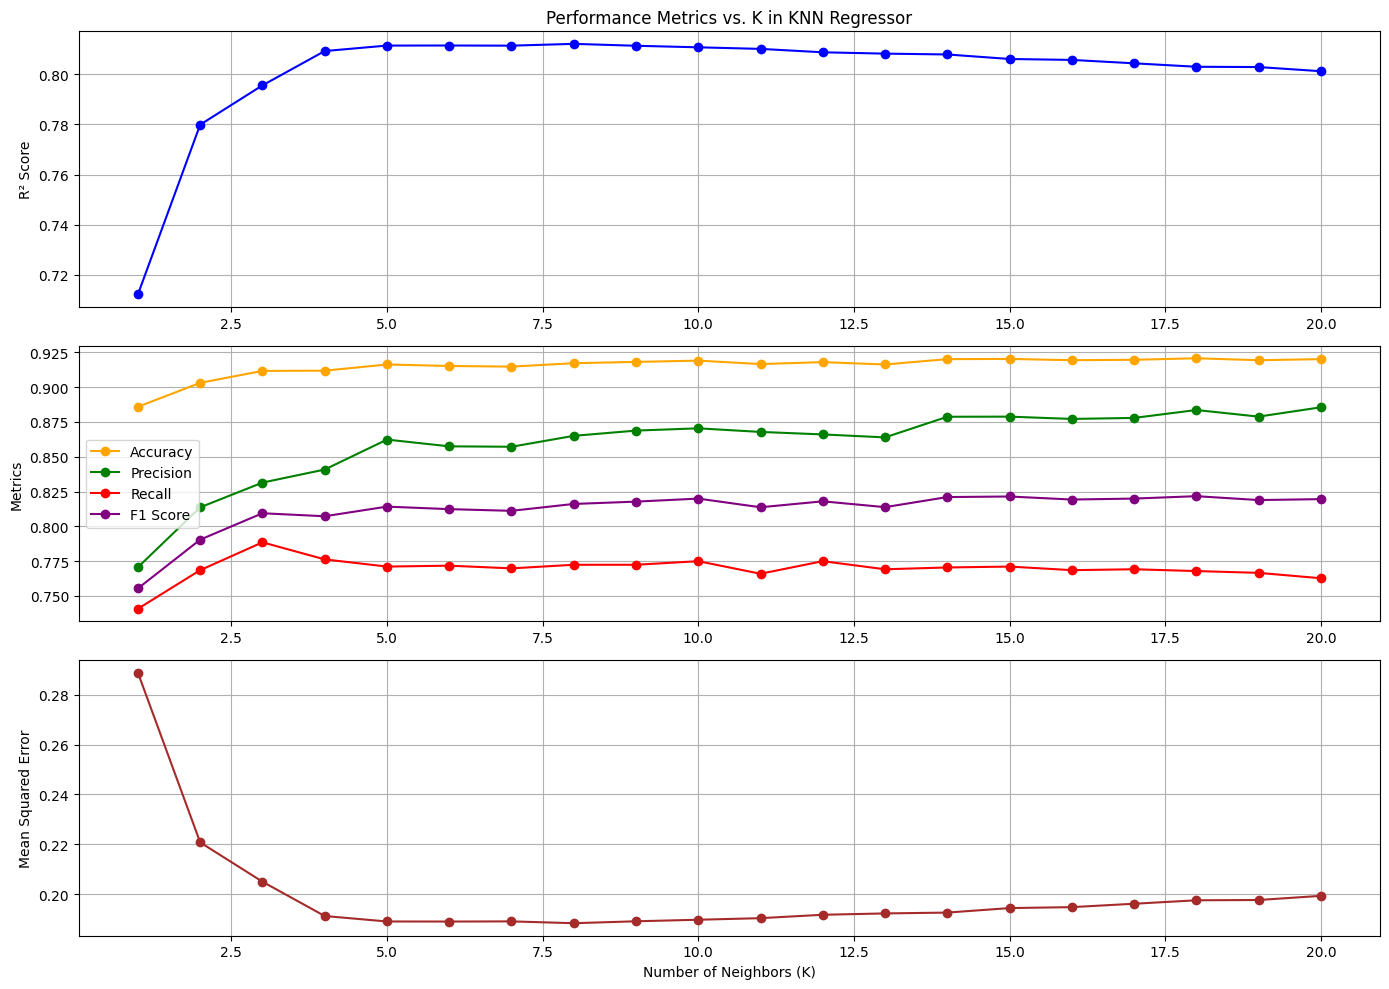

(8,
 K            8.000000
 MSE          0.188415
 R²           0.812206
 Accuracy     0.917140
 Precision    0.864982
 Recall       0.772405
 F1 Score     0.816076
 Name: 7, dtype: float64)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error

# Evaluate KNN Regressor for all K values using additional metrics
k_values = range(1, 21)
performance_metrics = []

for k in k_values:
    # Initialize and train KNN Regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Convert predictions to binary for classification-like evaluation
    y_pred_binary = (y_pred > 0.5).astype(int)
    y_test_binary = (y_test > 0.5).astype(int)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary, zero_division=0)
    recall = recall_score(y_test_binary, y_pred_binary, zero_division=0)
    f1 = f1_score(y_test_binary, y_pred_binary, zero_division=0)

    performance_metrics.append({
        'K': k,
        'MSE': mse,
        'R²': r2,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert metrics to a DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics)

# Visualize performance metrics across K values
plt.figure(figsize=(14, 10))

# Plot R² Score
plt.subplot(3, 1, 1)
plt.plot(performance_df['K'], performance_df['R²'], marker='o', label='R² Score', color='blue')
plt.title('Performance Metrics vs. K in KNN Regressor')
plt.ylabel('R² Score')
plt.grid()

# Plot Accuracy, Precision, Recall, F1 Score
plt.subplot(3, 1, 2)
plt.plot(performance_df['K'], performance_df['Accuracy'], marker='o', label='Accuracy', color='orange')
plt.plot(performance_df['K'], performance_df['Precision'], marker='o', label='Precision', color='green')
plt.plot(performance_df['K'], performance_df['Recall'], marker='o', label='Recall', color='red')
plt.plot(performance_df['K'], performance_df['F1 Score'], marker='o', label='F1 Score', color='purple')
plt.ylabel('Metrics')
plt.legend()
plt.grid()

# Plot MSE
plt.subplot(3, 1, 3)
plt.plot(performance_df['K'], performance_df['MSE'], marker='o', label='MSE', color='brown')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid()

plt.tight_layout()
plt.show()

# Identify the optimal K value based on minimum MSE
optimal_k = performance_df.loc[performance_df['MSE'].idxmin(), 'K']
optimal_k, performance_df.loc[performance_df['MSE'].idxmin()]


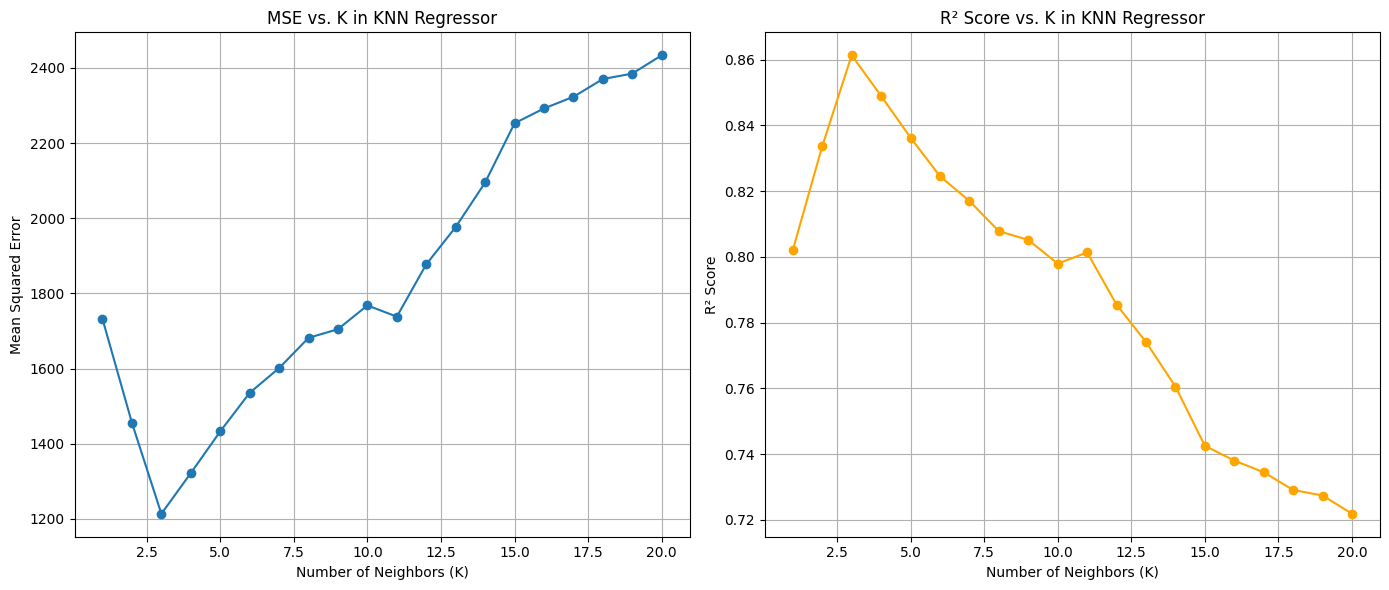

(3, 1213.3783660326214, 0.8613367993875715)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Generating synthetic dataset for demonstration purposes
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test K values from 1 to 20
k_values = range(1, 21)
mse_values = []
r2_values = []

for k in k_values:
    # Initialize and train KNN Regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE and R² values against k
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o')
plt.title('MSE vs. K in KNN Regressor')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid()

# Plot R² Score
plt.subplot(1, 2, 2)
plt.plot(k_values, r2_values, marker='o', color='orange')
plt.title('R² Score vs. K in KNN Regressor')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.grid()

plt.tight_layout()
plt.show()

# Identify the optimal K value (with minimum MSE)
optimal_k = k_values[mse_values.index(min(mse_values))]
optimal_k_value = optimal_k
optimal_mse = min(mse_values)
optimal_r2 = r2_values[mse_values.index(min(mse_values))]

optimal_k_value, optimal_mse, optimal_r2
